In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [10]:
df = pd.read_csv('../data/survey_clean_rick.csv')
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,0,1,0,0,1,0,0,0,1,0
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,0,1,0,0,1,0,0,0,1,0


In [11]:
X = df.drop(columns = ['Weight', 'NObeyesdad'])
y = df['NObeyesdad']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [13]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [14]:
print(f'Train: {logreg.score(X_train, y_train)}')
print(f'Test: {logreg.score(X_test, y_test)}')

Train: 0.8888186986734049
Test: 0.8920454545454546


In [15]:
predslog = logreg.predict(X_test)

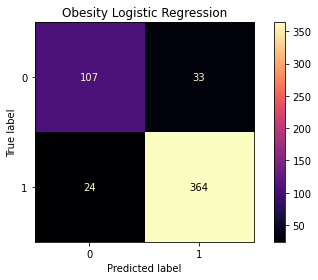

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, predslog, 
                                        cmap = 'magma',
                                       )
plt.title('Obesity Logistic Regression')

plt.tight_layout()
#plt.savefig('../images/logreg_simple_cmatrix');

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
print(f'Train: {rf.score(X_train, y_train)}')
print(f'Test: {rf.score(X_test, y_test)}')

Train: 1.0
Test: 0.9242424242424242


In [19]:
predsrf = rf.predict(X_test)

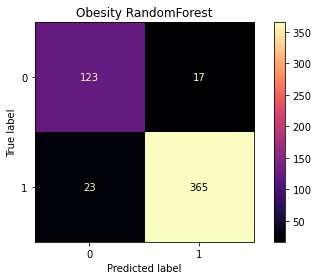

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, predsrf, 
                                        cmap = 'magma',
                                       )
plt.title('Obesity RandomForest')

plt.tight_layout()
#plt.savefig('../images/rf_simple_cmatrix');

In [21]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [22]:
print(f'Train: {ada.score(X_train, y_train)}')
print(f'Test: {ada.score(X_test, y_test)}')

Train: 0.8970309538850284
Test: 0.8863636363636364


In [23]:
predsada = ada.predict(X_test)

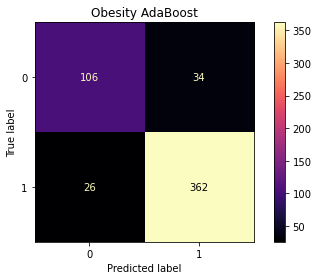

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, predsada, 
                                        cmap = 'magma',
                                       )
plt.title('Obesity AdaBoost')

plt.tight_layout()
#plt.savefig('../images/ada_simple_cmatrix');

In [25]:
gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)

GradientBoostingClassifier()

In [26]:
print(f'Train: {gr.score(X_train, y_train)}')
print(f'Test: {gr.score(X_test, y_test)}')

Train: 0.9538850284270373
Test: 0.9109848484848485


In [27]:
predsgr = gr.predict(X_test)

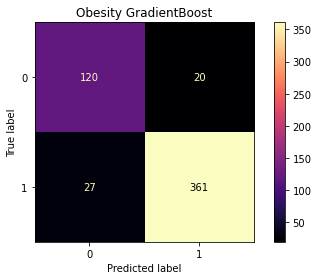

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, predsgr, 
                                        cmap = 'magma',
                                       )
plt.title('Obesity GradientBoost')

plt.tight_layout()
#plt.savefig('../images/gr_simple_cmatrix');